In [2]:
import sys
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch
from shapely.geometry import shape, Polygon
from rasterio.windows import Window
sys.path.insert(0, '../drift_inventory/utils/')

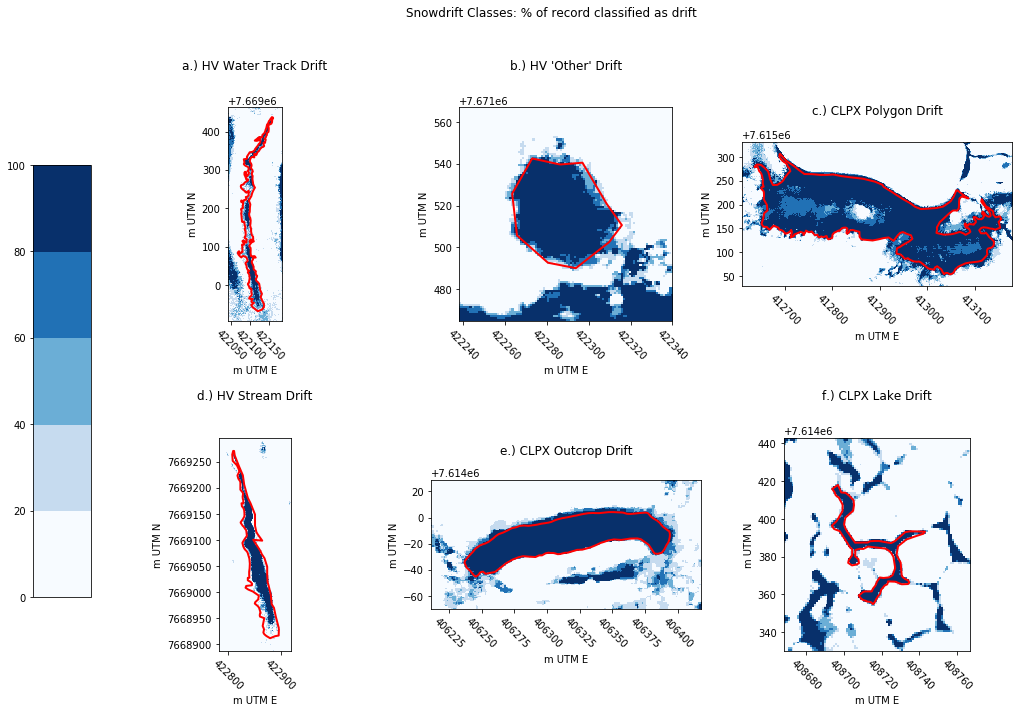

In [240]:
hv_drift = "../gis/hv_drifts.shp"
clpx_drift = "../gis/clpx_drifts.shp"
hv_rstr = '../drift_rasters/hv_driftmask_ct_years.tif'
clpx_rstr = '../drift_rasters/clpx_driftmask_ct_years.tif'

wt = [hv_drift, 1, hv_rstr, "a.) HV Water Track Drift"]
other = [hv_drift, 21, hv_rstr, "b.) HV 'Other' Drift"]
polycrack  = [clpx_drift, 2, clpx_rstr, "c.) CLPX Polygon Drift"]
stream = [hv_drift, 5, hv_rstr, "d.) HV Stream Drift"]
outcrop = [clpx_drift, 25, clpx_rstr, "e.) CLPX Outcrop Drift"]
lake = [clpx_drift, 19, clpx_rstr, "f.) CLPX Lake Drift"]


drift_plot_info = [wt, other, polycrack, stream, outcrop, lake]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

cmap = mpl.cm.get_cmap('Blues', 5)

i = 0
    
while i < len(drift_plot_info):
    
    shp = fiona.open(drift_plot_info[i][0], "r")
    drift_poly = shp[drift_plot_info[i][1]]
    
    drift_bbox = shape(drift_poly['geometry']).bounds
    left = int(drift_bbox[0]) - 25
    bottom = int(drift_bbox[1]) - 25
    right = int(drift_bbox[2]) + 25
    top = int(drift_bbox[3]) + 25
    height = top - bottom
    width = right - left
    
    src = rasterio.open(drift_plot_info[i][2])
    col_skip = abs(src.bounds.left - left)
    row_skip = src.bounds.top - top
    coords = drift_poly['geometry']['coordinates'][0]
    drift = Polygon(coords)
    patches = [PolygonPatch(drift, edgecolor="red", facecolor="none", linewidth=2)]
    
    win = Window(col_skip, row_skip, width, height)

    with rasterio.open(drift_plot_info[i][2]) as src:
        src_transform = src.transform
        win_transform = src.window_transform(win)
        w = src.read(1, window=Window(col_skip, row_skip, width, height))
        if i < 3:
            im = rasterio.plot.show(w/w.max() * 100, transform=win_transform, ax=axes[0][i], cmap=cmap)
            axes[0][i].add_collection(mpl.collections.PatchCollection(patches, match_original=True))
            axes[0][i].tick_params(axis='x', labelrotation=315)
        else:
            im = rasterio.plot.show(w/w.max() * 100, transform=win_transform, ax=axes[1][i-3], cmap=cmap)
            axes[1][i-3].add_collection(mpl.collections.PatchCollection(patches, match_original=True))
            axes[1][i-3].tick_params(axis='x', labelrotation=315)
        
        im.set_title(drift_plot_info[i][3], y=1.15)
        i += 1

        im.set_xlabel('m UTM E')
        im.set_ylabel('m UTM N')
        
cax = fig.add_axes( [0.05, 0.2, 0.05, 0.6] )
plt.colorbar(mappable=im.get_children()[-2], cax=cax, ticks = ( [0, 20, 40, 60, 80, 100] ) )
cax.yaxis.set_ticks_position('left')
plt.subplots_adjust(wspace=0.15, hspace=0.55)
plt.suptitle("Snowdrift Classes: % of record classified as drift", y=1.02)
plt.savefig('../figs/multipanel.png',dpi=300,bbox_inches='tight')

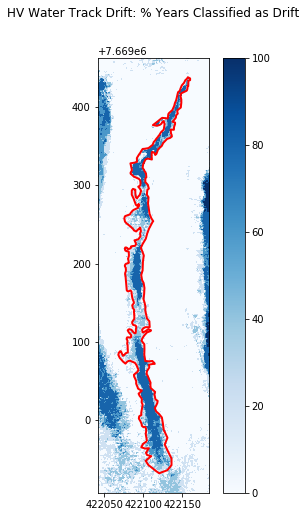

In [104]:
# get boundary box for drift from HV (happens to be watertrack)
shp = fiona.open("../gis/hv_drifts.shp", "r")
drift_poly = shp[1]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/hv_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
watertrack = Polygon(coords)
patches = [PolygonPatch(watertrack, edgecolor="red", facecolor="none", linewidth=2)]
watertrack

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/hv_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(5,8))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 5.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("HV Water Track Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])

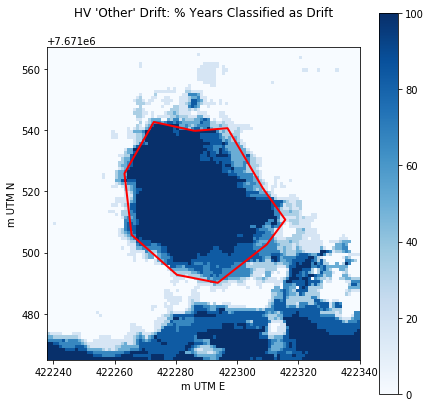

In [100]:
# Other Drift 
shp = fiona.open("../gis/hv_drifts.shp", "r")
drift_poly = shp[21]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/hv_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
other = Polygon(coords)
patches = [PolygonPatch(other, edgecolor="red", facecolor="none", linewidth=2)]

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/hv_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 6.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("HV 'Other' Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])#, cax=cax)
    plt.xlabel('m UTM E')
    plt.ylabel('m UTM N')



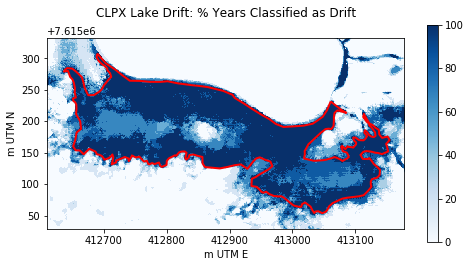

In [97]:
# Lake Drift (CLPX)
shp = fiona.open("../gis/clpx_drifts.shp", "r")
drift_poly = shp[2]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
other = Polygon(coords)
patches = [PolygonPatch(other, edgecolor="red", facecolor="none", linewidth=2)]
other

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 6.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("CLPX Lake Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])#, cax=cax)
    
    plt.xlabel('m UTM E')
    plt.ylabel('m UTM N')



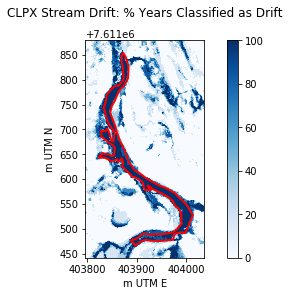

In [96]:
# Stream Drift (CLPX)
shp = fiona.open("../gis/clpx_drifts.shp", "r")
drift_poly = shp[5]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
stream = Polygon(coords)
patches = [PolygonPatch(other, edgecolor="red", facecolor="none", linewidth=2)]
stream

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 6.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("CLPX Stream Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])#, cax=cax)
    plt.xlabel('m UTM E')
    plt.ylabel('m UTM N')



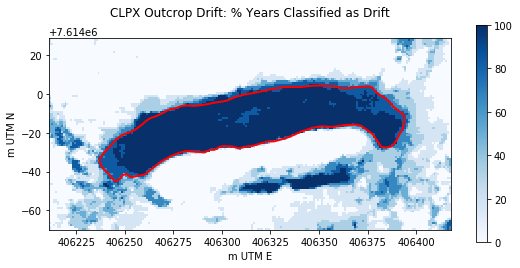

In [95]:
# Outcrop Drift (CLPX)
shp = fiona.open("../gis/clpx_drifts.shp", "r")
drift_poly = shp[25]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
outcrop = Polygon(coords)
patches = [PolygonPatch(outcrop, edgecolor="red", facecolor="none", linewidth=2)]

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(9,4))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 6.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("CLPX Outcrop Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])#, cax=cax)
    plt.xlabel('m UTM E')
    plt.ylabel('m UTM N')


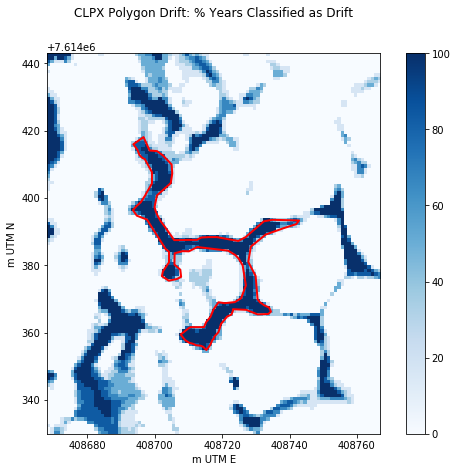

In [94]:
# Polygon Drift (CLPX)
shp = fiona.open("../gis/clpx_drifts.shp", "r")
drift_poly = shp[19]
drift_bbox = shape(drift_poly['geometry']).bounds
left = int(drift_bbox[0]) - 25
bottom = int(drift_bbox[1]) - 25
right = int(drift_bbox[2]) + 25
top = int(drift_bbox[3]) + 25
height = top - bottom
width = right - left
src = rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif')
rstr_bounds = src.bounds
col_skip = abs(src.bounds.left - left)
row_skip = src.bounds.top - top
coords = drift_poly['geometry']['coordinates'][0]
polycrack = Polygon(coords)
patches = [PolygonPatch(polycrack, edgecolor="red", facecolor="none", linewidth=2)]

win = Window(col_skip, row_skip, width, height)

with rasterio.open('../drift_rasters/clpx_driftmask_ct_years.tif') as src:
    src_transform = src.transform
    win_transform = src.window_transform(win)
    w = src.read(1, window=Window(col_skip, row_skip, width, height))
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111)
    im = rasterio.plot.show(w / 6.0 * 100, transform=win_transform, ax=ax, cmap='Blues')
    ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
    plt.title("CLPX Polygon Drift: % Years Classified as Drift", y=1.08)
    plt.colorbar(mappable=im.get_children()[-2])#, cax=cax)
    plt.xlabel('m UTM E')
    plt.ylabel('m UTM N')
